# Pipeline Step 3: Joining corresponding Production and Well data 

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wells = pd.read_csv('wells.csv')

/Users/krishankumar/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
wells.head()

,APINumber,PWT__ID
0,100001,100097216
1,120004,100097217
2,120005,100143246
3,120008,100143245
4,120008,100284671


In [4]:
wells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275813 entries, 0 to 275812
Data columns (total 2 columns):
APINumber    275813 non-null object
PWT__ID      275813 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.2+ MB


In [6]:
production = pd.read_csv('production.csv')

In [7]:
del production['Unnamed: 0']
production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35385878 entries, 0 to 35385877
Data columns (total 3 columns):
PWT__ID                    int64
OilorCondensateProduced    float64
ProductionDate             object
dtypes: float64(1), int64(1), object(1)
memory usage: 809.9+ MB


In [8]:
# Join the two tables 
merged = pd.merge(production, wells, 'left', 'PWT__ID')

In [9]:
merged.head()

,PWT__ID,OilorCondensateProduced,ProductionDate,APINumber
0,100000002,0.0,1/1/1977,3701167
1,100000014,272.0,1/1/1977,3700814
2,100000015,436.0,1/1/1977,3700815
3,100000016,0.0,1/1/1977,3700816
4,100000017,253.0,1/1/1977,3700817


In [10]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35387012 entries, 0 to 35387011
Data columns (total 4 columns):
PWT__ID                    int64
OilorCondensateProduced    float64
ProductionDate             object
APINumber                  object
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ GB


In [ ]:
# Save as a pickle file for easier acess later on. 
merged.to_pickle(merged)

In [11]:
tmp = merged[['PWT__ID','APINumber']].drop_duplicates()

In [12]:
gr1 = tmp.groupby('APINumber').count()

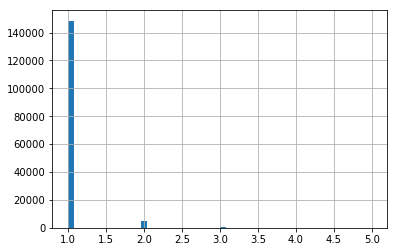

In [13]:
# Checking how many corresponding PWT IDs an API number can have. 
gr1.PWT__ID.hist(bins=50)

In [14]:
gr2 = tmp.groupby('PWT__ID').count()

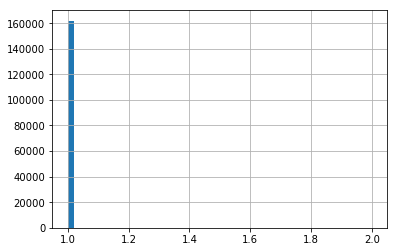

In [15]:
# Confirming that PWT IDs are unique to an API number. They are. 
gr2.APINumber.hist(bins=50)

In [16]:
gr2.head()

,APINumber
PWT__ID,
100000001,1
100000002,1
100000003,1
100000005,1
100000006,1


In [21]:
tmp = merged.groupby(['PWT__ID'], sort=False)['OilorCondensateProduced'].max()

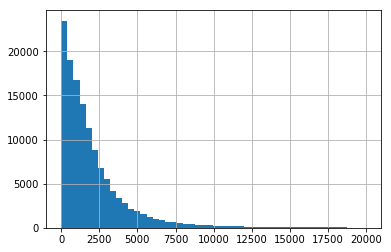

In [22]:
# Determining how many production values we have for each PWT ID. 
tmp[(tmp < 20000) & (tmp > 0)].hist(bins=50)

In [23]:
tmp[(tmp < 20000) & (tmp > 0)]

PWT__ID
100000014      516.0
100000015      642.0
100000016      196.0
100000017     1356.0
100000018      720.0
100000019      268.0
100000020     4897.0
100000021      175.0
100000022     2162.0
100000023      345.0
100000024     1187.0
100000025      562.0
100000026      219.0
100000027       75.0
100000028      492.0
100000029      831.0
100000030     1010.0
100000031      892.0
100000034      180.0
100000035     1898.0
100000036      235.0
100000041    14314.0
100000042    11318.0
100000044    10074.0
100000046    12414.0
100000048    16304.0
100000049    13273.0
100000056     5547.0
100000057    10266.0
100000058    13105.0
              ...   
100317161       38.0
100317163       46.0
100317186       14.0
100317847      670.0
100317352       28.0
100317849      430.0
100317351      325.0
100314195      202.0
100314070     1148.0
100315281     1955.0
100315138      369.0
100315154      588.0
100315204      298.0
100317135     2213.0
100317146     1706.0
100317848      791.0
10031

In [24]:
tmp = merged.groupby(['PWT__ID'], sort=False)['OilorCondensateProduced'].agg(np.count_nonzero)

In [25]:
tmp.head()

PWT__ID
100000002      0.0
100000014    301.0
100000015    228.0
100000016     50.0
100000017    369.0
Name: OilorCondensateProduced, dtype: float64

In [26]:
np.sort(merged[merged.PWT__ID == 100019040]['OilorCondensateProduced'].values)

array([    0.,    30.,    41.,    50.,    52.,    52.,    61.,    67.,
          69.,    71.,    75.,    84.,    85.,    86.,    89.,    90.,
          90.,    93.,    95.,   101.,   106.,   108.,   116.,   122.,
         130.,   130.,   134.,   135.,   136.,   136.,   138.,   140.,
         144.,   150.,   157.,   162.,   162.,   164.,   166.,   166.,
         171.,   175.,   176.,   181.,   181.,   190.,   191.,   197.,
         197.,   224.,   229.,   234.,   269.,   273.,   274.,   280.,
         293.,   298.,   301.,   305.,   312.,   315.,   316.,   327.,
         337.,   350.,   368.,   383.,   389.,   408.,   410.,   422.,
         425.,   426.,   435.,   470.,   474.,   494.,   505.,   509.,
         549.,   566.,   573.,   578.,   580.,   594.,   606.,   637.,
         642.,   647.,   653.,   654.,   656.,   666.,   679.,   704.,
         716.,   727.,   756.,   757.,   759.,   760.,   764.,   793.,
         814.,   834.,   850.,   861.,   877.,   892.,   892.,   894.,
      

In [42]:
tmp[tmp > 400].shape

(9127,)

In [28]:
merged[merged.PWT__ID==100000134].head()

,PWT__ID,OilorCondensateProduced,ProductionDate,APINumber
79,100000134,2315.0,1/1/1977,3720044
41865,100000134,2344.0,2/1/1977,3720044
82540,100000134,2222.0,3/1/1977,3720044
129116,100000134,1568.0,4/1/1977,3720044
175286,100000134,2031.0,5/1/1977,3720044


In [34]:
ex1 = merged[merged.PWT__ID==100000760]

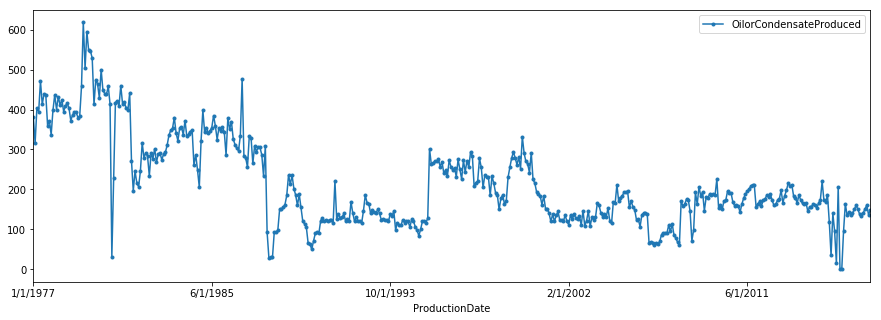

In [35]:
ex1.plot(x='ProductionDate', y='OilorCondensateProduced', marker='.', figsize=(15,5))

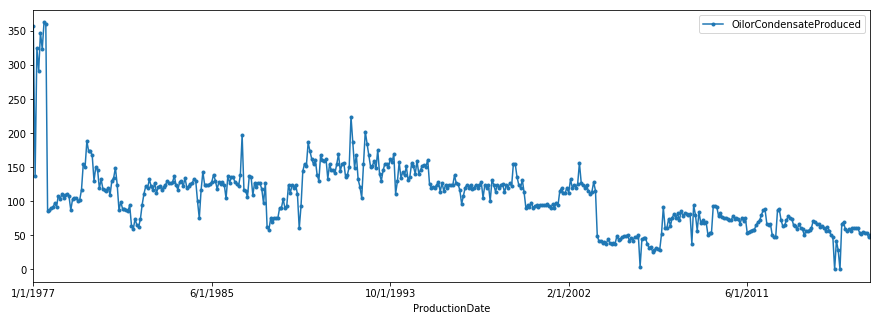

In [38]:
ex2 = merged[merged.PWT__ID==100000741]
ex2.plot(x='ProductionDate', y='OilorCondensateProduced', marker='.', figsize=(15,5))

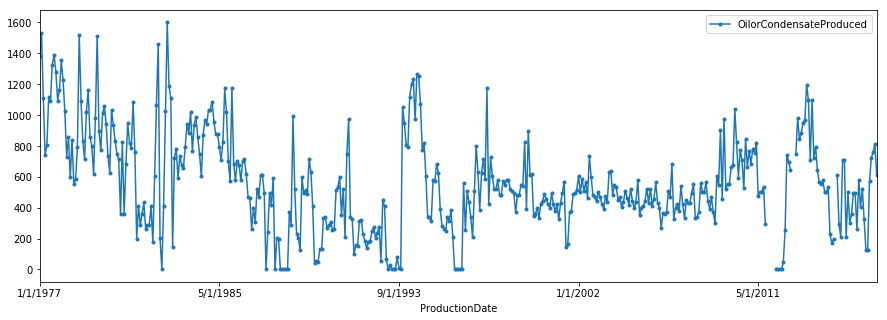

In [39]:
ex3 = merged[merged.PWT__ID==100000214]
ex3.plot(x='ProductionDate', y='OilorCondensateProduced', marker='.', figsize=(15,5))

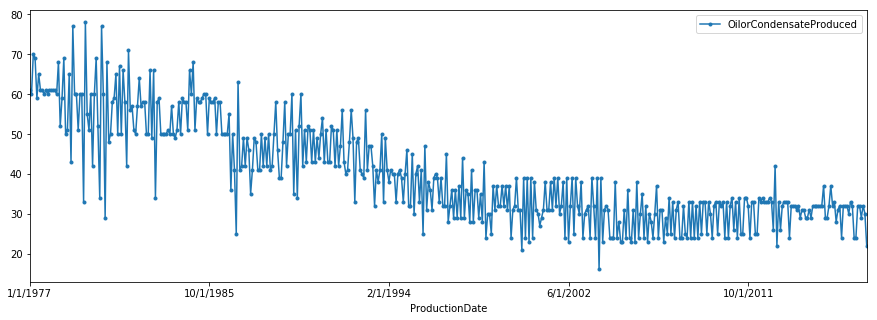

In [40]:
ex4 = merged[merged.PWT__ID==100000766 ]
ex4.plot(x='ProductionDate', y='OilorCondensateProduced', marker='.', figsize=(15,5))

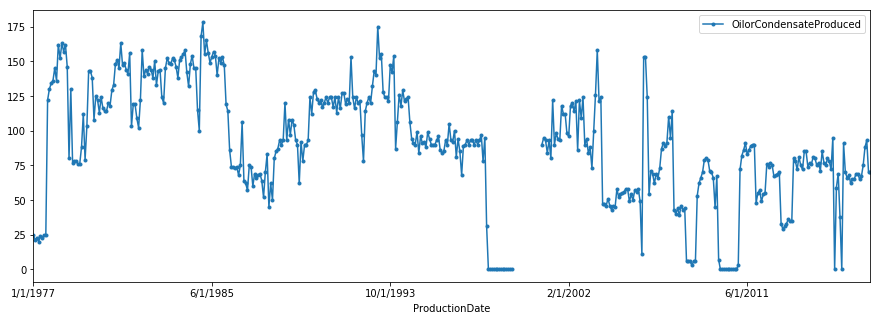

In [43]:
ex5 = merged[merged.PWT__ID== 100000743]
ex5.plot(x='ProductionDate', y='OilorCondensateProduced', marker='.', figsize=(15,5))

In [45]:
np.sort(ex4.OilorCondensateProduced.values)

array([ 16.,  21.,  22.,  22.,  23.,  23.,  23.,  23.,  23.,  23.,  23.,
        23.,  23.,  24.,  24.,  24.,  24.,  24.,  24.,  24.,  24.,  24.,
        24.,  24.,  24.,  24.,  24.,  24.,  24.,  24.,  24.,  24.,  24.,
        24.,  24.,  24.,  24.,  24.,  24.,  24.,  24.,  24.,  24.,  24.,
        24.,  24.,  24.,  25.,  25.,  25.,  25.,  25.,  25.,  25.,  25.,
        25.,  25.,  25.,  25.,  25.,  25.,  26.,  26.,  26.,  27.,  28.,
        28.,  28.,  28.,  28.,  28.,  28.,  29.,  29.,  29.,  29.,  29.,
        29.,  29.,  29.,  29.,  29.,  29.,  29.,  29.,  29.,  29.,  30.,
        30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,  30.,
        30.,  31.,  31.,  31.,  31.,  31.,  31.,  31.,  31.,  31.,  31.,
        31.,  31.,  31.,  31.,  31.,  31.,  31.,  31.,  31.,  31.,  31.,
        31.,  31.,  31.,  31.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,
        32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,  32.,
        32.,  32.,  32.,  32.,  32.,  32.,  32.,  3

In [46]:
ex1.shape[0]

470

In [47]:
ex2.shape[0]

470

In [50]:
ex5.shape[0]

470